## Dinucleotides and dipeptides

We counted the occurrence of individual nucleotides in the genome and residues in the proteome.

In real biological sequences, adjacent positions are rarely independent. We now have ways to talk about these sort of inter-dependencies using probabilities.

We'll start by counting adjacent pairs of nucleotides in the genome. When a sequence has $N$ bases, it has $N-1$ adjacent pairs: $0$ and $1$, $1$ and $2$, $2$ and $3$, and so forth all the way to $N-2$, $N-1$.

An easy way to get a pandas `Series` of these adjacent pairs is to:
1. create a Series of first nucleotides in a pair
2. create a Series of second nucleotides in a pair
3. add together these two series

We'll see how this works on a test string
```
alphabet='abcdefghijklmnopqrstuvwxyz'
```

In [14]:
import pandas as pd
alphabet='abcdefghijklmnopqrstuvwxyz'
first_letters = pd.Series(list(alphabet[0:-1]))
second_letters = pd.Series(list(alphabet[1:]))
pairs = first_letters + second_letters
pairs

0     ab
1     bc
2     cd
3     de
4     ef
5     fg
6     gh
7     hi
8     ij
9     jk
10    kl
11    lm
12    mn
13    no
14    op
15    pq
16    qr
17    rs
18    st
19    tu
20    uv
21    vw
22    wx
23    xy
24    yz
dtype: object

### Yeast genome dinucleotides
First we need to import the `Bio.SeqIO` module from `biopython` so we can read in our yeast sequences.

In [16]:
from Bio import SeqIO

Then we need to import the `pandas` module for our `Series` and `DataFrame` types, and the `matplotlib.pyplot` module to make graphs.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 

Here is a copy of our code to
1. Create `proteins` as an iterator over all the protein sequences
2. Create an empty `Series` of amino acid counts
3. Loop over each protein
    1. Count the nubmer of residues in that one protein
    1. Add that residue count to the running tally
5. Print the sorted version of our count series
6. Plot a bar graph of our counts

*      6064.0
W     30592.0
C     37287.0
M     61220.0
H     63795.0
Y     99429.0
Q    116054.0
P    128629.0
F    130264.0
R    130554.0
G    146138.0
A    161450.0
V    163368.0
D    171556.0
T    173814.0
N    180883.0
E    191723.0
I    192717.0
K    215733.0
S    264092.0
L    279435.0
dtype: float64


<AxesSubplot:>

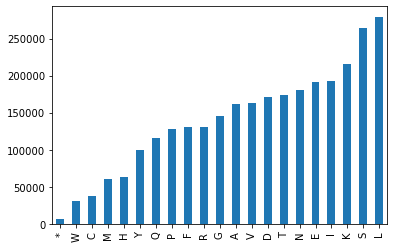

In [19]:
proteins = SeqIO.parse("../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta", "fasta")
total_counts = pd.Series(dtype='int64')

for protein in proteins:
    protein_counts = pd.Series(list(protein.seq)).value_counts()
    total_counts = total_counts.add(protein_counts, fill_value=0)
print(total_counts.sort_values())
total_counts.sort_values().plot(kind='bar')

### Dipeptides

Now we'll use the approach above to count every adjacent pair of amino acids.

We'll make a series of first amino acids in `first_aas`, a series of second amino acids in `second_aas`, and then combine them to count them.

In [20]:
proteins = SeqIO.parse("../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta", "fasta")
total_counts = pd.Series(dtype='int64')

for protein in proteins:
    first_aas = pd.Series(list(protein.seq[0:-1]))
    second_aas = pd.Series(list(protein.seq[1:]))
    protein_counts = (first_aas + second_aas).value_counts()
    total_counts = total_counts.add(protein_counts, fill_value=0)

In [22]:
total_counts.sort_values()

*E        1.0
*F        1.0
*Y        1.0
*K        1.0
*M        1.0
       ...   
LK    21887.0
LS    24445.0
SL    24535.0
LL    27655.0
SS    31531.0
Length: 437, dtype: float64

#### Probabilities

Convert the counts to probabilities by 
1. Using the `.sum()` method to find the total number of dinucleotides counted
2. Dividing the `nt_series` series by this sum to get "normalized" probabilities

#### Marginal probabilities

The table of dinucleotide probabilities give the _joint_ distribution.

There are two way to compute the _marginal_ probability of an `A`. Compute this both ways and compare it to the value we got from the single-nucleotide counting above.

Write a `for` loop to compute all four marginal probabilities. It's probably easiest to create an empty dictionary, then loop over each nucleotide option, compute its marginal probability, and store it in the dictionary. 

There are many reasonable ways to approach this, though

#### Conditional probabilities

Compute the _conditional_ probability of a `C` following a first `A`. Is this higher or lower than the unconditional (marginal) probability of a `C`?

If you want to take this a bit further: write a pair of nested for loops to compute all of the conditional probabilities for the 2nd nucleotide of a dinucleotide, conditional on the identity of the first.

What nucleotide combinations have conditional probabilities that are very different from the marginal?

Another way of looking at this is to compute the ratio `P(MN) / (P(M) * P(N))`, which is the ratio between the observed dinucleotide probability and the expected dinucleotide probabilty under the assumption of independence.

#### Dipeptides

If you want to take this a lot further, you can run the same sort of analysis on dipeptides in the yeast proteome. 
Here's a slightly updated version of our loop to count amino acid frequencies in the yeast proteome, if you want ot try this out.

In [ ]:
proteins = SeqIO.parse("../S288C_R64-2-1/orf_trans_all_R64-2-1_20150113.fasta", "fasta")
aa_count = {}
for protein in proteins:
    protseq = str(protein.seq)
    for pos in range(0, len(protseq)):
        aa = protseq[pos]
        aa_count[aa] = aa_count.get(aa, 0) + 1
print(aa_count)